5. 삼성 전자 주식 다음달 가격 얼마일까? (회귀)
8. 비트코인 다음 달 어떻게 될까? (회귀)
16. 전날 비트 코인 상승하면 다음날 주가와의 상관관계(correlation)

1. 목표 설정
  1. Y : 미래 30일의 국내 특정 주식과 비트코인의 종가
  1. X : 최근 60일간의 데이터
    1. step : 하루 간격
    1. 양 : 1 년(2018년 6월 ~2019년 6월)
1. 데이터 획득
  1. 국내 기업 1개, 비트 코인 
1. 데이터 통합
  1. 두 데이터 날짜 기준으로 통합(axis=1)
    1. 외국(2018-01-01), 국내(2018.1.1),(18.1.1)
    1. 날짜 포맷을 (YYYY-MM-DD) 으로 변환 후 통합
1. 데이터 정제
  1. 누락
1. 데이터 전처리  
  1. 특수기호, 문자 > 수치 변환  
1. 비트코인 가격 변화와 주가와의 상관관계(correlation)
  1.cov()
1. 입력X /출력Y 분리
  1. m개의 x,y 쌍
  1. x(m, 60, 15) (국내증시컬럼 + 비트코인컬럼) > reshape > (m, 60*15)
  1. y(m, 30, 2) > (m, 30 * 2)  
1. 학습용/검증용(test) 분리
  1. 섞으면 안되므로 직접 분리
  1. 가장 과거의 데이터 10% 를 검증용으로 사용
1. 모델 선정
  1. Ridge 모델. 학습용 데이터로 학습
  1. 성능 측정
1. 그래프로 시각화
  1. 과거
  1. 미래의 예측 predict( x(1, 60*15) )  > return  >  y_hat(1, 30 * 2)
     1. 미래 예측(1, 30 * 2) > (30,2) > 국내(30), 비트코인(30) > 그래프로 그리기

국내 기업 데이터 획득 6/1/2018 ~ 6/1/2019

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#주소중간에 _day 가 추가됩니다
samsung_url='https://finance.naver.com/item/sise_day.nhn?code=005930'

In [18]:
tables = pd.read_html(samsung_url+'&page='+str(1))
len(tables)
samsung = tables[0]
samsung.shape

(15, 7)

In [31]:
samsungs = []
for i in range(1, 28):
    tables = pd.read_html(samsung_url+'&page='+str(i))
    samsung = tables[0]
    samsungs.append(samsung)
len(samsungs)

27

In [32]:
samsung = pd.concat(samsungs, axis=0)
samsung.shape

(405, 7)

In [36]:
samsung.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
10,2018.05.31,50700.0,1200.0,50400.0,50800.0,49850.0,63491109.0
11,2018.05.30,49500.0,1800.0,51300.0,51500.0,49100.0,20498098.0
12,2018.05.29,51300.0,1000.0,52200.0,52500.0,51300.0,8480437.0
13,2018.05.28,52300.0,400.0,52500.0,53000.0,52000.0,9787820.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
bitcoin_url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/'
bitcoin_url +='?start=20180601&end=20190601'
tables = pd.read_html(bitcoin_url)
bitcoin = tables[0]
len(tables)

2

In [51]:
bitcoin.head(2)

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jun 01, 2019",8573.84,8625.60,8481.58,8564.02,22488303544,151890214310
1,"May 31, 2019",8320.29,8586.66,8172.55,8574.50,25365190957,152059886414


In [52]:
samsung.head(2)

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.07.03,45700.0,550.0,45750.0,46350.0,45600.0,3502562.0


In [53]:
bitcoin.shape, samsung.shape

((366, 7), (405, 7))

데이터 통합
- 두 데이터 날짜 기준으로 통합(axis=1)
- 외국(2018-01-01), 국내(2018.1.1),(18.1.1)
- 날짜 포맷을 (YYYY-MM-DD) 으로 변환 후 통합

In [ ]:
#날짜를 인덱스로
samsung = samsung.set_index('날짜')

In [56]:
bitcoin = bitcoin.set_index('Date')

In [65]:
# 인덱스 타입이 object
pd.to_datetime(bitcoin.index) #비트 코인의 인덱스를 날짜로 바꾸기

DatetimeIndex(['2019-06-01', '2019-05-31', '2019-05-30', '2019-05-29',
               '2019-05-28', '2019-05-27', '2019-05-26', '2019-05-25',
               '2019-05-24', '2019-05-23',
               ...
               '2018-06-10', '2018-06-09', '2018-06-08', '2018-06-07',
               '2018-06-06', '2018-06-05', '2018-06-04', '2018-06-03',
               '2018-06-02', '2018-06-01'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [66]:
pd.to_datetime(samsung.index)

DatetimeIndex([       'NaT', '2019-07-03', '2019-07-02', '2019-07-01',
               '2019-06-28', '2019-06-27',        'NaT',        'NaT',
                      'NaT', '2019-06-26',
               ...
               '2018-06-04',        'NaT',        'NaT',        'NaT',
               '2018-06-01', '2018-05-31', '2018-05-30', '2018-05-29',
               '2018-05-28',        'NaT'],
              dtype='datetime64[ns]', name='날짜', length=405, freq=None)

In [67]:
#인덱스 타입을 날짜 타입으로 변환
bitcoin.index = pd.to_datetime(bitcoin.index)
samsung.index = pd.to_datetime(samsung.index)

In [73]:
#통합
df = pd.concat((samsung, bitcoin), axis=1).dropna()
df.shape

(244, 12)

In [80]:
df.isna().sum().sum() # 누락값 없다

0

In [ ]:
df.describe()

전날 비트 코인 상승하면 다음날 주가와의 상관관계(correlation)

In [92]:
비트코인변화 = df['Open*'] -  df['Close**']
주가변화 =  df['시가'] -  df['종가']
과거비트코인변화 = 비트코인변화.iloc[:-1]
다음날주가변화 = 주가변화.iloc[1:]

In [99]:
np.corrcoef(과거비트코인변화, 다음날주가변화)
#상관계수가 0에 가까우므로 둘은 상관관계가 거의 없습니다

array([[ 1.        , -0.07316871],
       [-0.07316871,  1.        ]])

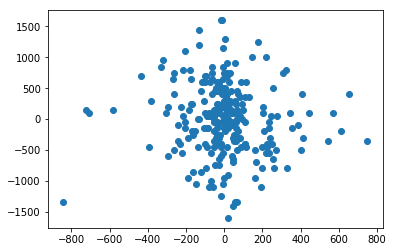

In [94]:
p = plt.scatter(과거비트코인변화, 다음날주가변화)

In [83]:
df.head()

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
2018-06-01,51300.0,600.0,50500.0,51700.0,49950.0,13038499.0,7500.70,7604.73,7407.34,7541.45,4.921460e+09,1.287259e+11
2018-06-04,51100.0,200.0,50800.0,51200.0,50700.0,9767171.0,7722.53,7753.82,7474.04,7514.47,4.993170e+09,1.283122e+11
2018-06-05,51300.0,200.0,51100.0,51400.0,50400.0,9144100.0,7500.90,7643.23,7397.00,7633.76,4.961740e+09,1.303659e+11
2018-06-07,50600.0,700.0,51800.0,51800.0,50500.0,13590016.0,7650.82,7741.27,7650.82,7678.24,4.485800e+09,1.311532e+11
2018-06-08,49650.0,950.0,50200.0,50400.0,49600.0,16951706.0,7685.14,7698.19,7558.40,7624.92,4.227580e+09,1.302562e+11


In [ ]:
비트코인종가 = df['Close**']
전날비트코인가격변화 = 

In [81]:
df.cov() #covariance 상관관계 

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
종가,6.846078e+06,-1.755498e+04,6.807220e+06,6.780417e+06,6.748902e+06,-1.768174e+09,1.509873e+06,1.509372e+06,1.519761e+06,1.530810e+06,-1.766514e+12,2.530176e+13
전일비,-1.755498e+04,1.984669e+05,-1.146445e+04,2.638181e+04,-4.971497e+04,8.561799e+08,-1.569126e+04,-2.158713e+04,-1.742792e+04,-2.561715e+04,-1.813583e+11,-4.628508e+11
시가,6.807220e+06,-1.146445e+04,7.094596e+06,6.898380e+06,6.874931e+06,-1.543646e+09,1.544614e+06,1.544355e+06,1.547371e+06,1.560183e+06,-1.646136e+12,2.579749e+13
고가,6.780417e+06,2.638181e+04,6.898380e+06,6.845196e+06,6.757650e+06,-1.307755e+09,1.532320e+06,1.531849e+06,1.541699e+06,1.551951e+06,-1.657222e+12,2.567207e+13
저가,6.748902e+06,-4.971497e+04,6.874931e+06,6.757650e+06,6.786465e+06,-1.902252e+09,1.518191e+06,1.521359e+06,1.524395e+06,1.540312e+06,-1.758229e+12,2.544846e+13
거래량,-1.768174e+09,8.561799e+08,-1.543646e+09,-1.307755e+09,-1.902252e+09,1.539529e+13,-6.895658e+08,-7.620610e+08,-6.713624e+08,-7.452021e+08,8.860541e+14,-1.248894e+16
Open*,1.509873e+06,-1.569126e+04,1.544614e+06,1.532320e+06,1.518191e+06,-6.895658e+08,2.294040e+06,2.326722e+06,2.226557e+06,2.271367e+06,1.577697e+12,3.895097e+13
High,1.509372e+06,-2.158713e+04,1.544355e+06,1.531849e+06,1.521359e+06,-7.620610e+08,2.326722e+06,2.380016e+06,2.264298e+06,2.324452e+06,1.850203e+12,3.988235e+13
Low,1.519761e+06,-1.742792e+04,1.547371e+06,1.541699e+06,1.524395e+06,-6.713624e+08,2.226557e+06,2.264298e+06,2.181327e+06,2.226544e+06,1.453797e+12,3.818191e+13
Close**,1.530810e+06,-2.561715e+04,1.560183e+06,1.551951e+06,1.540312e+06,-7.452021e+08,2.271367e+06,2.324452e+06,2.226544e+06,2.287781e+06,1.706507e+12,3.925147e+13


입력X /출력Y 분리
- m개의 x,y 쌍
- x(m, 60, 15) (국내증시컬럼 + 비트코인컬럼) > reshape > (m, 60*15)
- y(m, 30, 2) > (m, 30 * 2)

In [103]:
input_seq = 60
output_seq = 30
m = len(df) - (input_seq + output_seq) + 1
len(df), m

(244, 155)

In [191]:
#df = df/ df.sum() # max 정규화
df = (df - df.min()) / (df.max()-df.min()) #min_max 정규화
x_list = []
y_list = []
for i in range(m):
    x = df.iloc[i:i+input_seq]
    y = df.iloc[i+input_seq:i+input_seq+output_seq][['종가', 'Close**']]
    x_list.append(x)
    y_list.append(y)

In [192]:
len(x_list), type(x_list) #(155, 60, 12)
#numpy array 로 변환
x_3d = np.stack(x_list, axis=0)
y_3d = np.stack(y_list, axis=0)
x_3d.shape, y_3d.shape

((155, 60, 12), (155, 30, 2))

train / test 분리
- test 10%

In [193]:
test_ratio = 0.1
test_m = int(len(x_3d)*test_ratio)
test_m

15

In [194]:
m = len(x_3d)
x_2d = np.reshape(x_3d, [m, -1])
y_2d = np.reshape(y_3d, [m, -1])
x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]

In [195]:
#model, Linear Regression , 가중치를 작게 제약시킨다 > 모든 정보를 활용해서 예측
from sklearn.linear_model import Ridge, Lasso
model = Ridge(normalize=True, solver='lsqr').fit(x_train, y_train) # 2차원 이하만 가능

In [196]:
model.score(x_train, y_train), model.score(x_test, y_test) #과적합 발생

(0.976736244847297, -14.854965579147551)

In [197]:
#가장 최근 데이터
recent = df.iloc[-input_seq:]
recent = np.reshape(np.array(recent), [1, -1])
recent.shape 

(1, 720)

In [198]:
p = model.predict(recent)#미래 예측
p = np.reshape(p, [output_seq, -1])
p.shape

(30, 2)

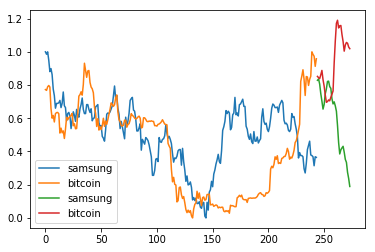

In [200]:
xm = len(df)
plt.plot(np.arange(xm), df['종가'].values, label='samsung')
plt.plot(np.arange(xm), df['Close**'].values, label='bitcoin')
plt.plot(np.arange(xm,xm+output_seq), p[:, 0], label='samsung')
plt.plot(np.arange(xm,xm+output_seq), p[:, 1], label='bitcoin')
plt.legend()